<a href="https://colab.research.google.com/github/Sksubhan/App/blob/main/RFM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install plotly

In [ ]:
pip install nbformat --upgrade

In [ ]:
import pandas as pd
import datetime as dt
import plotly.express as px
import plotly.graph_objects as go
import plotly.colors


In [ ]:
data=pd.read_csv('/content/online_retail.csv')
data.tail(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
11699,537262,21930,JUMBO STORAGE BAG SKULLS,1,2010-12-06 11:26:00,1.95,15039.0,United Kingdom
11700,537262,22382,LUNCH BAG SPACEBOY DESIGN,1,2010-12-06 11:26:00,1.65,15039.0,United Kingdom
11701,537262,71477,COLOUR GLASS. STAR T-LIGHT HOLDER,1,2010-12-06 11:26:00,3.25,15039.0,United Kingdom
11702,537262,15056N,EDWARDIAN PARASOL NATURAL,3,2010-12-06 11:26:00,5.95,15039.0,United Kingdom
11703,537262,20685,DOORMAT RED RETROSPOT,1,201,NaN,NaN,NaN


In [ ]:
data.tail(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
11699,537262,21930,JUMBO STORAGE BAG SKULLS,1,2010-12-06 11:26:00,1.95,15039.0,United Kingdom
11700,537262,22382,LUNCH BAG SPACEBOY DESIGN,1,2010-12-06 11:26:00,1.65,15039.0,United Kingdom
11701,537262,71477,COLOUR GLASS. STAR T-LIGHT HOLDER,1,2010-12-06 11:26:00,3.25,15039.0,United Kingdom
11702,537262,15056N,EDWARDIAN PARASOL NATURAL,3,2010-12-06 11:26:00,5.95,15039.0,United Kingdom
11703,537262,20685,DOORMAT RED RETROSPOT,1,201,NaN,NaN,NaN


In [ ]:
data.dropna(inplace=True)

In [ ]:
data.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
data.tail(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
11702,537262,15056N,EDWARDIAN PARASOL NATURAL,3,2010-12-06 11:26:00,5.95,15039.0,United Kingdom


In [ ]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'], errors='coerce')


In [ ]:
data['TotalAmount']=data['Quantity']*data['UnitPrice']

In [ ]:
data.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [ ]:
from datetime import datetime as dt

today_date=pd.Timestamp(dt.now().date())
today_date


Timestamp('2024-07-30 00:00:00')

In [ ]:
from datetime import timedelta
refernce_date=data['InvoiceDate'].max()+timedelta(days=1)
data['InvoiceDate'].max()

Timestamp('2010-12-06 11:26:00')

In [ ]:
refernce_date

Timestamp('2010-12-07 11:26:00')

In [ ]:
rfm= data.groupby('CustomerID').agg({
    'InvoiceDate':lambda x:(refernce_date-x.max()).days,
    'InvoiceNo':'count',
    'TotalAmount':'sum'
})

In [ ]:
rfm.rename(columns={'InvoiceDate':'Recency','InvoiceNo':'Frequency','TotalAmount':'value'},inplace=True)

In [ ]:
rfm.head()

,Recency,Frequency,value
CustomerID,,,
12395.0,3,12,346.10
12427.0,4,10,303.50
12431.0,6,14,358.25
12433.0,5,73,1919.14
12471.0,5,1,-17.00


In [ ]:
quantiles=rfm.quantile(q=[0.25,0.50,0.75])

def RScore(x,p,d):
  if p=='Recency':
    if x<=d[p][0.25]:
      return 4
    elif x<=d[p][0.50]:
      return 3
    elif x<=d[p][0.75]:
      return 2
    else:
      return 1
  else:
    if x<=d[p][0.25]:
      return 1
    elif x<=d[p][0.50]:
      return 2
    elif x<=d[p][0.75]:
      return 3
    else:
      return 4



In [ ]:
rfm['R']=rfm['Recency'].apply(RScore, args=('Recency',quantiles,))
rfm['F']=rfm['Frequency'].apply(RScore, args=('Frequency',quantiles,))
rfm['M']=rfm['value'].apply(RScore, args=('value',quantiles,))

In [ ]:
rfm.head(5)

,Recency,Frequency,value,R,F,M
CustomerID,,,,,,
12395.0,3,12,346.10,3,2,3
12427.0,4,10,303.50,3,2,3
12431.0,6,14,358.25,1,2,3
12433.0,5,73,1919.14,2,4,4
12471.0,5,1,-17.00,2,1,1


In [ ]:
rfm['dfm_segment']=rfm['R'].astype(str)+rfm['F'].astype(str)+rfm['M'].astype(str)
rfm['total_score']=rfm[['R','F','M']].sum(axis=1)

In [ ]:
rfm.head(5)

,Recency,Frequency,value,R,F,M,dfm_segment,total_score
CustomerID,,,,,,,,
12395.0,3,12,346.10,3,2,3,323,8
12427.0,4,10,303.50,3,2,3,323,8
12431.0,6,14,358.25,1,2,3,123,6
12433.0,5,73,1919.14,2,4,4,244,10
12471.0,5,1,-17.00,2,1,1,211,4


In [ ]:
segment_lables=['low_value','Mid-value','High-value']

def assign_segment(score):
  if score < 5:
    return 'low_value'
  elif score <9:
    return 'mid_value'

  else:
    return 'high_value'

rfm['rfm_segment_label']=rfm['total_score'].apply(assign_segment)

In [ ]:
rfm.head(5)

,Recency,Frequency,value,R,F,M,dfm_segment,total_score,rfm_segment_label
CustomerID,,,,,,,,,
12395.0,3,12,346.10,3,2,3,323,8,mid_value
12427.0,4,10,303.50,3,2,3,323,8,mid_value
12431.0,6,14,358.25,1,2,3,123,6,mid_value
12433.0,5,73,1919.14,2,4,4,244,10,high_value
12471.0,5,1,-17.00,2,1,1,211,4,low_value


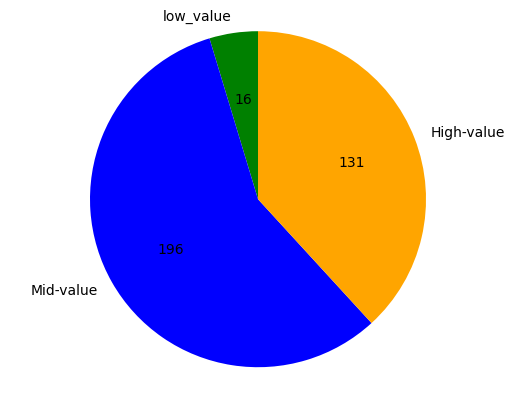

In [ ]:
import matplotlib.pyplot as plt
a='low_value'
c,cc,ccc=0,0,0
for i in rfm['rfm_segment_label']:
  if i==a:
    c+=1
  elif i=='mid_value':
    cc+=1
  else:
    ccc+=1
labels1=['low_value','Mid-value','High-value']
l=[c,cc, ccc]
fig,x=plt.subplots()
def func(pct, allvals):
    absolute = int(round(pct / 100. * sum(allvals)))
    return f'{absolute}'
x.pie(l, labels=labels1, colors=['green','blue','orange'], autopct=lambda pct: func(pct, l), startangle=90)
x.axis('equal')
plt.show()

In [ ]:
low=rfm.loc[rfm['rfm_segment_label']=='low_value', ['total_score','rfm_segment_label']]
high=rfm.loc[rfm['rfm_segment_label']=='high_value', ['total_score','rfm_segment_label']]
mid=rfm.loc[rfm['rfm_segment_label']=='mid_value', ['total_score','rfm_segment_label']]

In [ ]:
segment_counts=rfm['rfm_segment_label'].value_counts().reset_index()
segment_counts.columns=['rfm_segment','count']
segment_counts=segment_counts.sort_values('count').reset_index() # sort the table based on count column in segment_counts table and reset_index() helps to reset index

In [ ]:
segment_counts


,index,rfm_segment,count
0,2,low_value,16
1,1,high_value,131
2,0,mid_value,196


In [ ]:
fig=px.bar(segment_counts,
           x='rfm_segment',
           y='count',
           title='    Custoumer Distribution by RFM Segment',
           labels={'rfm_segment':"RFM_Segment",'count':'Number of Custoumeers'})
fig.update_traces(text=segment_counts['count'], textposition='outside')
fig.show()

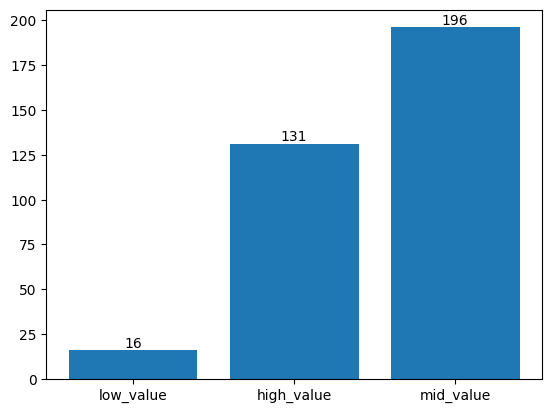

In [ ]:
fig,ax=plt.subplots()
bars=ax.bar(segment_counts['rfm_segment'],segment_counts['count'])
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height}',
            ha='center', va='bottom')
plt.show()